# Обработка таблицы

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
amazon_df=pd.read_csv('/content/drive/MyDrive/курс python analitic/Portfolio Lesson/amazon_market_data.csv')

In [4]:
amazon_df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [5]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [6]:
amazon_df.isna().sum()

,0
Order Date,0
Row ID,0
Order ID,0
Ship Mode,0
Customer ID,0
Segment,0
Country,0
City,0
State,0
Postal Code,0


In [7]:
amazon_df.duplicated().sum()

np.int64(0)

In [8]:
# Преобразуем даты в формат даты
amazon_df['Order Date'] = pd.to_datetime(amazon_df['Order Date'])
amazon_df['Postal Code'] = amazon_df['Postal Code'].astype(str)

<ipython-input-8-dddb2b0ee43e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_df['Order Date'] = pd.to_datetime(amazon_df['Order Date'])


# Аналитика

1. Сколько уникальных заказов и сколько уникальных клиентов содержится в таблице

In [9]:
print("Уникальные заказы:", amazon_df['Order ID'].nunique())
print("Уникальные клиенты:", amazon_df['Customer ID'].nunique())

Уникальные заказы: 1687
Уникальные клиенты: 693


2. Изучи локацию пользователей. Рекомендуем построить три столбчатые диаграммы по регионам, штатам и городам, отсортировать их и добавить текстовый комментарий, который объяснит, где больше заказов, а где меньше;

<Axes: title={'center': 'Заказы по регионам'}, xlabel='Region'>

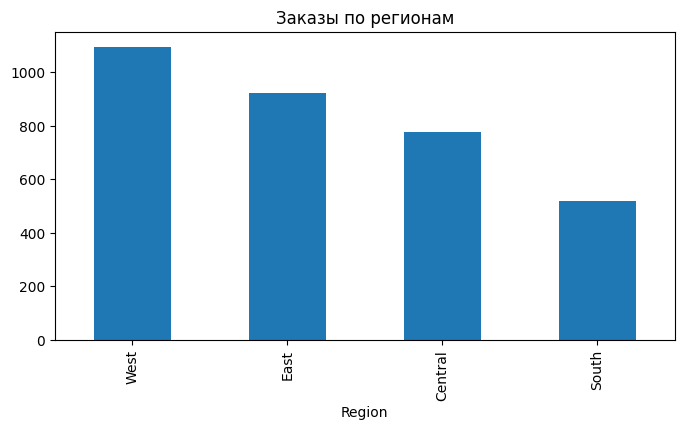

In [10]:
# Регионы
region_orders = amazon_df['Region'].value_counts().sort_values(ascending=False)
region_orders.plot(kind='bar', title='Заказы по регионам', figsize=(8,4))


<Axes: title={'center': 'Топ-10 штатов по заказам'}, xlabel='State'>

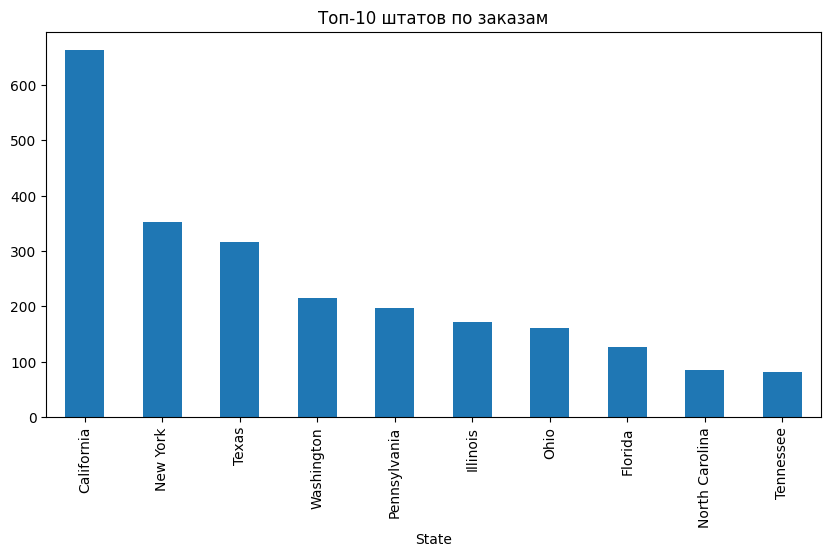

In [11]:
# Штаты (топ-10)
state_orders = amazon_df['State'].value_counts().sort_values(ascending=False).head(10)
state_orders.plot(kind='bar', title='Топ-10 штатов по заказам', figsize=(10,5))

<Axes: title={'center': 'Топ-10 городов по заказам'}, xlabel='City'>

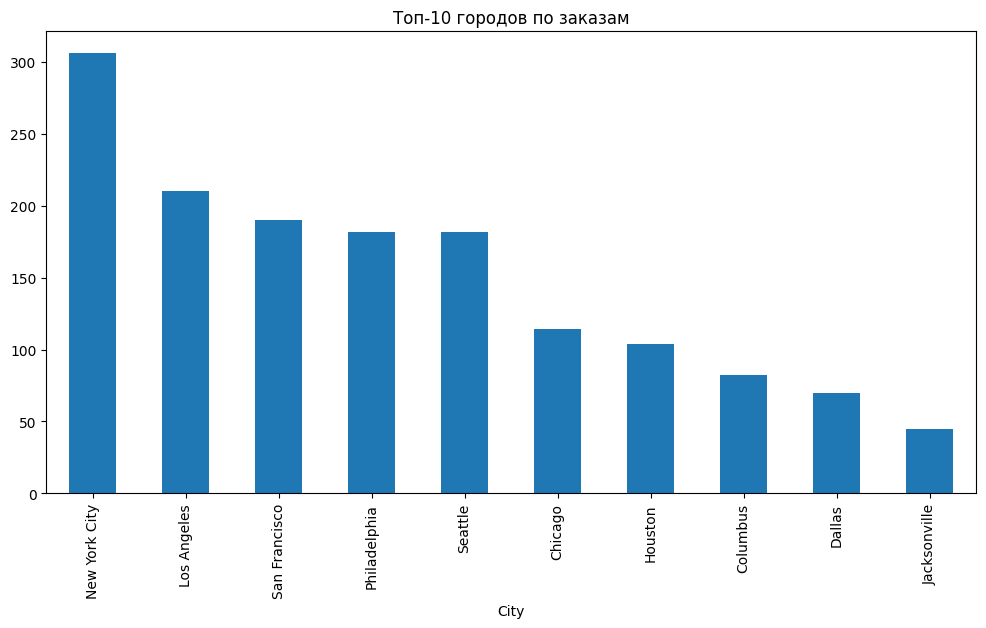

In [12]:
# Города (топ-10)
city_orders = amazon_df['City'].value_counts().sort_values(ascending=False).head(10)
city_orders.plot(kind='bar', title='Топ-10 городов по заказам', figsize=(12,6))

ВЫВОД:
- Наибольшее количество заказов на западе США, наименьшее на юге США
- Топ-3 штата: Калифорния, Нью Йорк и Техас, при этом наибольшее количество заказо в Калифорнии. Наименьшее количество заказов в штатах Сев.Каролина и Теннеси.
- Город Нью Йорк лидирует с более чем 300 заказами (9.2% от общего числа заказов), наименьшее количество заказов в г.Джексонвиль (1.2%)

In [13]:
total_orders = len(amazon_df)
nyc_orders = amazon_df['City'].value_counts().get('New York City', 0)
nyc_percent = round((nyc_orders / total_orders) * 100, 1)

print(f"New York City: {nyc_orders} заказов ({nyc_percent}% от общего числа)")

New York City: 306 заказов (9.2% от общего числа)


3. Изучи динамику количества заказов по дате заказа. Сгруппируй данные по дате заказа, посчитай количество заказов и визуализируй результат - скорее всего, при этом нужно будет усечь данные до месяца. Отметь падение (либо рост), после чего отрази это в текстовой ячейке;

<ipython-input-14-34734ba74604>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = amazon_df.set_index('Order Date').resample('M')['Order ID'].nunique()


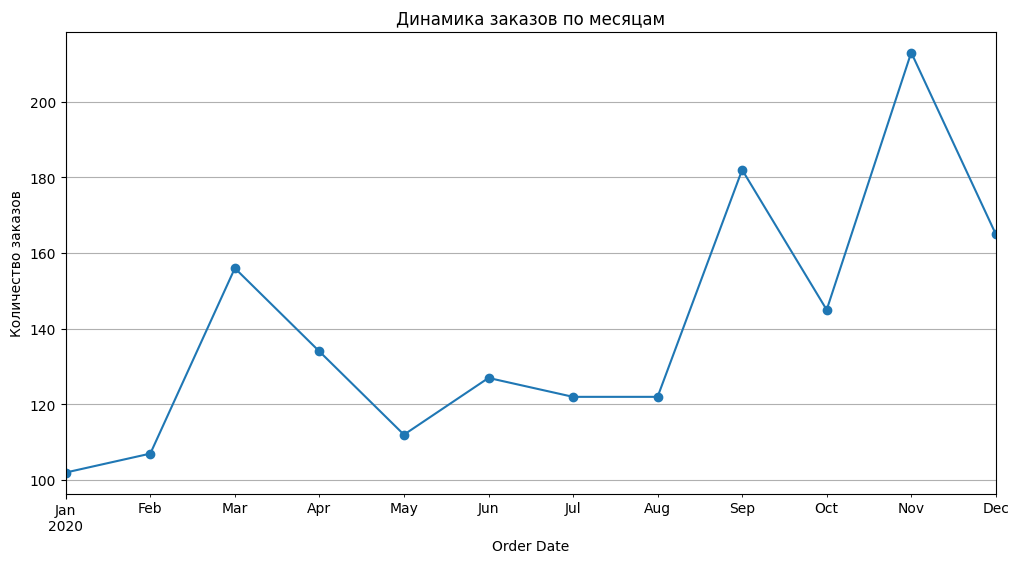

In [14]:
# Группировка по месяцам и подсчет заказов
monthly_orders = amazon_df.set_index('Order Date').resample('M')['Order ID'].nunique()

# Визуализация
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Динамика заказов по месяцам')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Вывод:
- Пик заказов в 11.2020 - 213 заказов.
С марта по май наблюдается падение  на 28%. С августа начался подъем до пика на 74%
Последний месяц 12.2020 г. показывает снижение на 33% по сравнению с пиком.

In [15]:
monthly_orders = amazon_df.set_index('Order Date').resample('M')['Order ID'].nunique()
monthly_orders

<ipython-input-15-ac2c43176d32>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = amazon_df.set_index('Order Date').resample('M')['Order ID'].nunique()


,Order ID
Order Date,
2020-01-31,102
2020-02-29,107
2020-03-31,156
2020-04-30,134
2020-05-31,112
2020-06-30,127
2020-07-31,122
2020-08-31,122
2020-09-30,182


5. Изучи динамику продаж по сумме (поле Sales)

<ipython-input-16-b820d0e66eaf>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = amazon_df.set_index('Order Date')['Sales'].resample('M').sum()


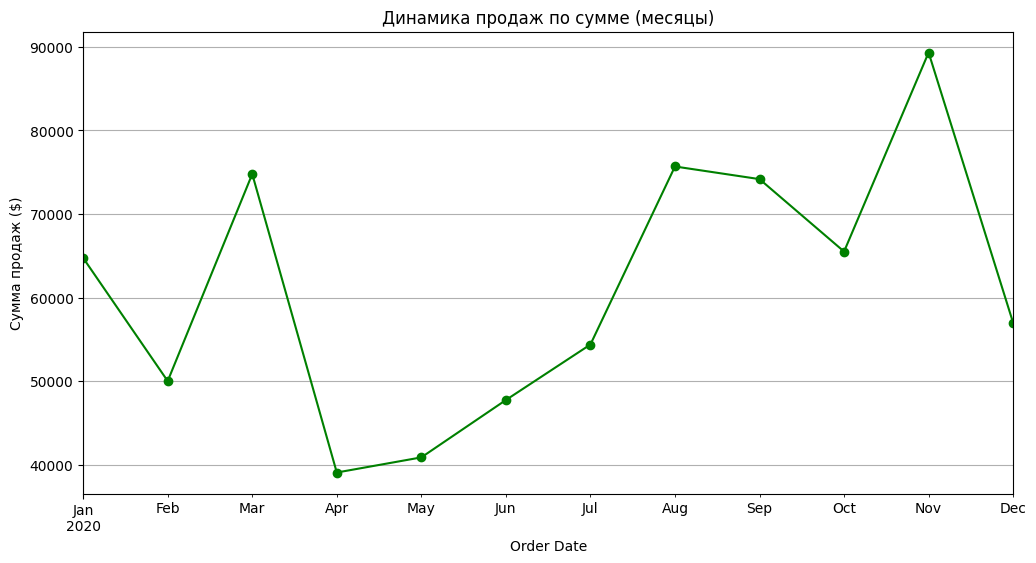

In [16]:
# Динамика продаж по месяцам
monthly_sales = amazon_df.set_index('Order Date')['Sales'].resample('M').sum()

# График
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Динамика продаж по сумме (месяцы)')
plt.ylabel('Сумма продаж ($)')
plt.grid(True)
plt.show()

# Анализ изменений (пример для последних 2 месяцев)
last_two_months = monthly_sales.tail(2)
pct_change = (last_two_months.iloc[-1] / last_two_months.iloc[0] - 1) * 100

Вывод:
- Пик продаж: 11.2020 - $89,3.
- Минимум: 04.2020 - $39.
- Последнее изменение: падение на 36% за месяц.

In [17]:
print(f"Максимум: {monthly_sales.idxmax().strftime('%m.%Y')} - ${monthly_sales.max():,.0f}")
print(f"Минимум: {monthly_sales.idxmin().strftime('%m.%Y')} - ${monthly_sales.min():,.0f}")
print(f"Изменение за последний период: {pct_change:.1f}%")

Максимум: 11.2020 - $89,306
Минимум: 04.2020 - $39,072
Изменение за последний период: -36.2%


6. Изучи распределение продаж по категориям заказов. Здесь нужно создать сводную таблицу, группируя данные по категориям и подкатегориям, суммируя продажи по полю Sales. Визуализируй результат на двух графиках в формате столбчатой диаграммы: один для суммарных продаж по категориям, другой под подкатегориям. Оцени в текстовом выводе, какие категории и подкатегории лидируют, а какие находятся в конце списка;

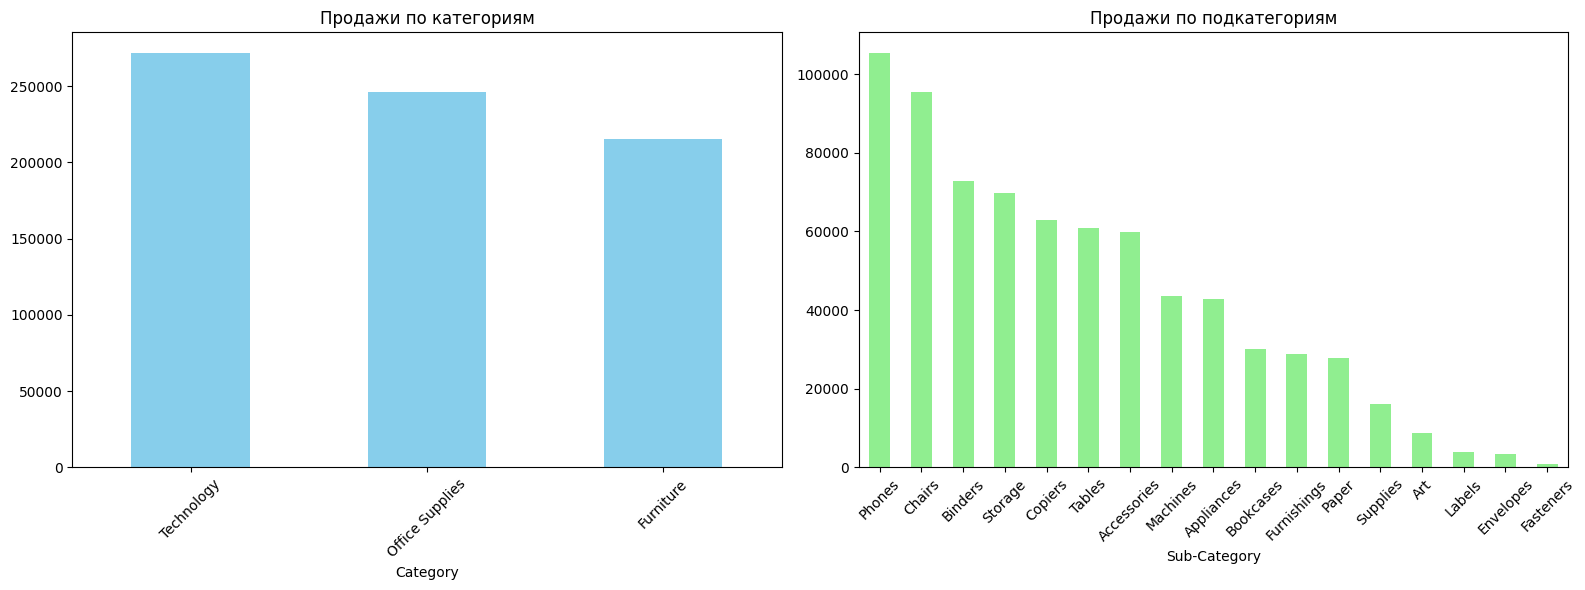


ЛИДЕРЫ:
- Категория [Technology] - 37.1% от всех продаж
- Подкатегория [Phones] - 14.4% от всех продаж

АУТСАЙДЕРЫ:
- Категория [Furniture] - 29.4%
- Подкатегория [Fasteners] - 0.1%



<ipython-input-18-d4c9dcb3d8c8>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_category_percent = (category_sales[0] / total_sales * 100).round(1)
<ipython-input-18-d4c9dcb3d8c8>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_subcategory_percent = (subcategory_sales[0] / total_sales * 100).round(1)
<ipython-input-18-d4c9dcb3d8c8>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - Категория [{bottom_category}] - {(cate

In [18]:
import matplotlib.pyplot as plt

# Сводная таблица
category_sales = amazon_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
subcategory_sales = amazon_df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Графики
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

category_sales.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Продажи по категориям')
ax[0].tick_params(axis='x', rotation=45)

subcategory_sales.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Продажи по подкатегориям')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Текстовый вывод
total_sales = category_sales.sum()
top_category = category_sales.index[0]
top_category_percent = (category_sales[0] / total_sales * 100).round(1)
bottom_category = category_sales.index[-1]

top_subcategory = subcategory_sales.index[0]
top_subcategory_percent = (subcategory_sales[0] / total_sales * 100).round(1)
bottom_subcategory = subcategory_sales.index[-1]

print(f"""
ЛИДЕРЫ:
- Категория [{top_category}] - {top_category_percent}% от всех продаж
- Подкатегория [{top_subcategory}] - {top_subcategory_percent}% от всех продаж

АУТСАЙДЕРЫ:
- Категория [{bottom_category}] - {(category_sales[-1]/total_sales*100).round(1)}%
- Подкатегория [{bottom_subcategory}] - {(subcategory_sales[-1]/total_sales*100).round(1)}%
""")

Вывод:
ЛИДЕРЫ:
- Категория [Technology] - 37.1% от всех продаж
- Подкатегория [Phones] - 14.4% от всех продаж

АУТСАЙДЕРЫ:
- Категория [Furniture] - 29.4%
- Подкатегория [Fasteners] - 0.1%

7. Проанализируй распределение продаж по городам, штатам и регионам, а также найди закономерности;

<ipython-input-35-c8725e815492>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=region_sales.values, y=region_sales.index, ax=axes[0], palette="Blues_d")
<ipython-input-35-c8725e815492>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=top_states.values, y=top_states.index, ax=axes[1], palette="Greens_d")
<ipython-input-35-c8725e815492>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[2], palette="rocket")


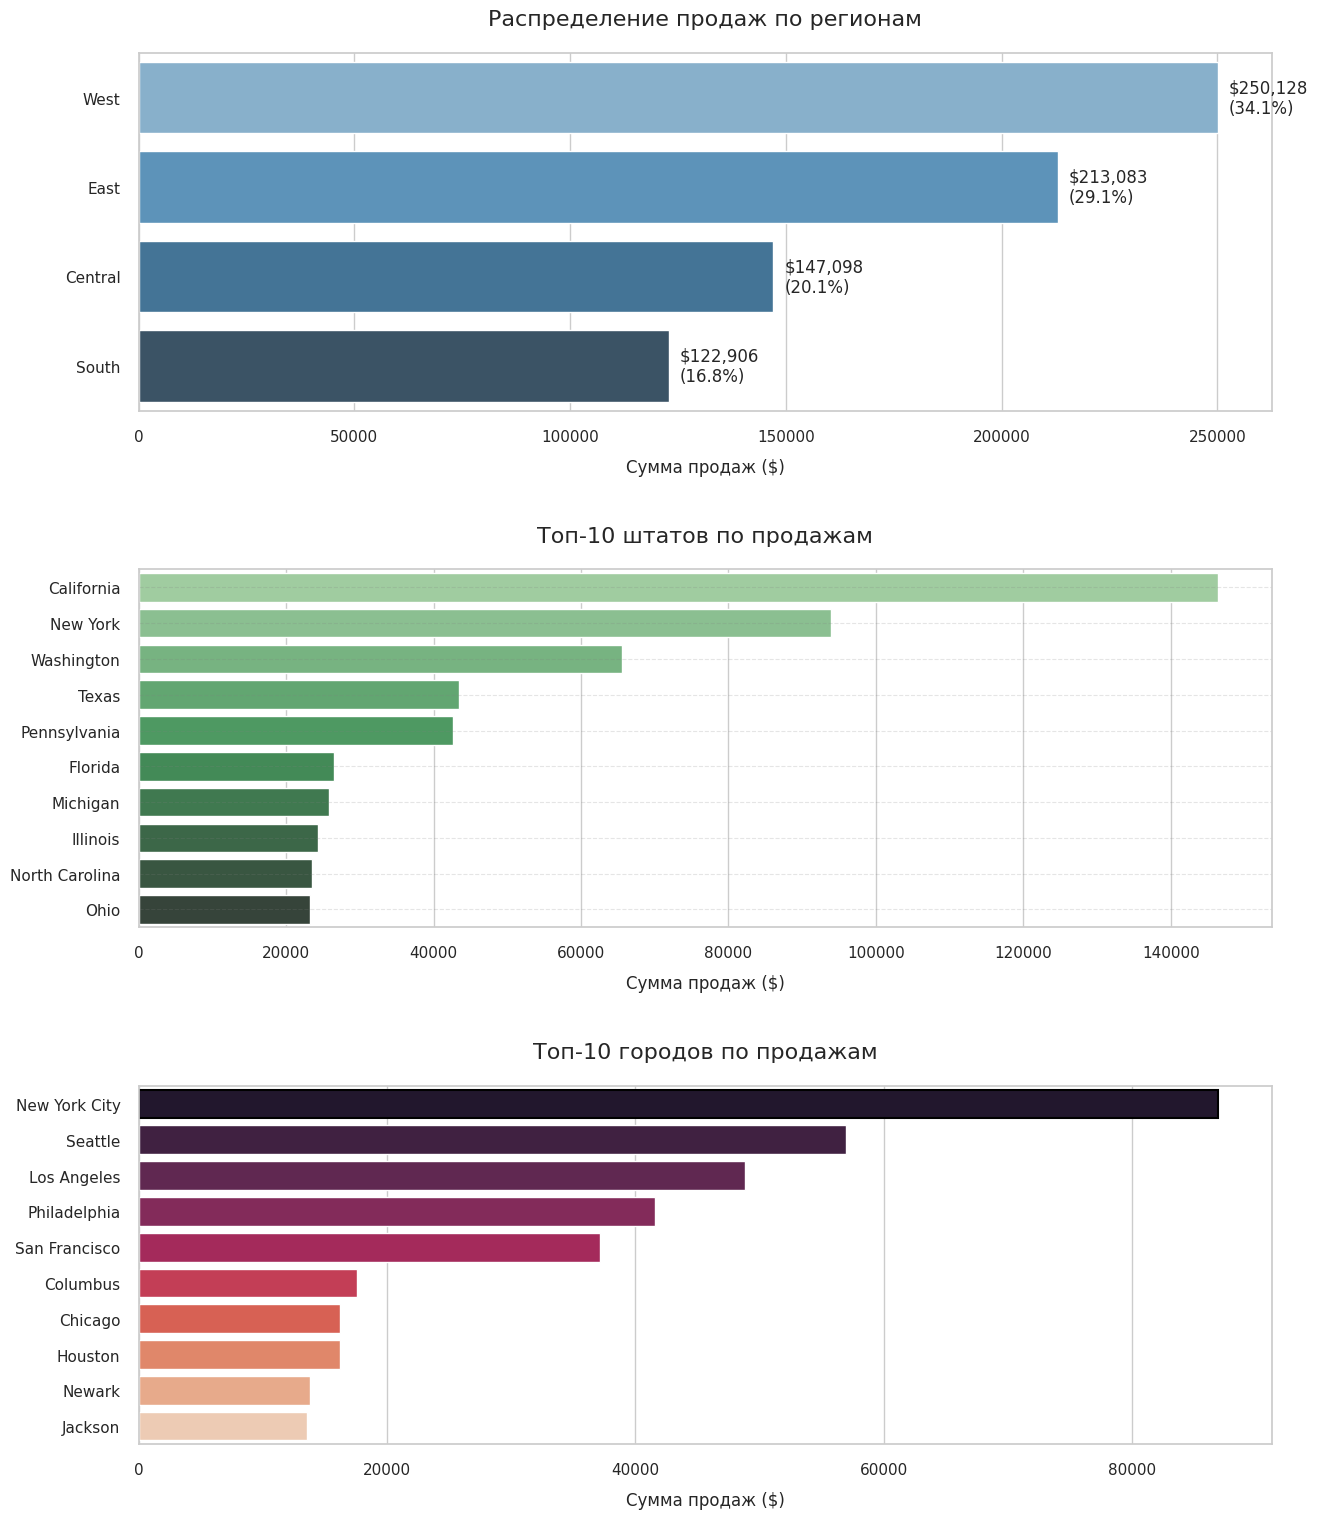


ЗАКОНОМЕРНОСТИ:
1. Регион West доминирует (34.1% всех продаж)
2. Штат California и город New York City синхронно лидируют: Нет
3. В South самые низкие продажи (122,906$)
4. Топ-3 города дают 55.2% продаж в топ-10



<ipython-input-35-c8725e815492>:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  region_dominance = (region_sales[0] / region_sales.sum() * 100).round(1)
<ipython-input-35-c8725e815492>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  3. В {bottom_region} самые низкие продажи ({region_sales[-1]:,.0f}$)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 16})

# Создаем фигуру с тремя сабплотами
fig, axes = plt.subplots(3, 1, figsize=(14, 16))

# 1. Распределение по регионам (с аннотациями)
region_sales = amazon_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
ax1 = sns.barplot(x=region_sales.values, y=region_sales.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Распределение продаж по регионам', pad=20)
axes[0].set_xlabel('Сумма продаж ($)', labelpad=10)
axes[0].set_ylabel('')

# Добавляем аннотации
for p in ax1.patches:
    width = p.get_width()
    axes[0].text(width + region_sales.max()*0.01,
                p.get_y() + p.get_height()/2,
                f'${width:,.0f}\n({width/region_sales.sum()*100:.1f}%)',
                va='center')

# 2. Топ-10 штатов (с горизонтальными линиями)
top_states = amazon_df.groupby('State')['Sales'].sum().nlargest(10)
ax2 = sns.barplot(x=top_states.values, y=top_states.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Топ-10 штатов по продажам', pad=20)
axes[1].set_xlabel('Сумма продаж ($)', labelpad=10)
axes[1].set_ylabel('')

# Добавляем линии для лучшей читаемости
for y in range(len(top_states)):
    axes[1].axhline(y, color='gray', linestyle='--', alpha=0.2, lw=0.8)

# 3. Топ-10 городов (горизонтальные бары с градиентом)
top_cities = amazon_df.groupby('City')['Sales'].sum().nlargest(10)
ax3 = sns.barplot(x=top_cities.values, y=top_cities.index, ax=axes[2], palette="rocket")
axes[2].set_title('Топ-10 городов по продажам', pad=20)
axes[2].set_xlabel('Сумма продаж ($)', labelpad=10)
axes[2].set_ylabel('')

# Выделяем первый элемент
ax3.patches[0].set_edgecolor('black')
ax3.patches[0].set_linewidth(1.5)

plt.tight_layout(pad=3.0)
plt.show()

# Аналитический вывод (остается без изменений)
top_region = region_sales.index[0]
top_state = top_states.index[0]
top_city = top_cities.index[0]
bottom_region = region_sales.index[-1]
region_dominance = (region_sales[0] / region_sales.sum() * 100).round(1)
state_city_same = top_state in top_cities.index[:3]

print(f"""
ЗАКОНОМЕРНОСТИ:
1. Регион {top_region} доминирует ({region_dominance}% всех продаж)
2. Штат {top_state} и город {top_city} синхронно лидируют: {'Да' if state_city_same else 'Нет'}
3. В {bottom_region} самые низкие продажи ({region_sales[-1]:,.0f}$)
4. Топ-3 города дают {top_cities.head(3).sum() / top_cities.sum() * 100:.1f}% продаж в топ-10
""")

Вывод:
1. Регион West доминирует (34.1% всех продаж)
2. Штат California и город New York City синхронно лидируют: Нет
3. В South самые низкие продажи (122,906$)
4. Топ-3 города дают 55.2% продаж в топ-10

In [20]:
# Проверка корреляции продаж штатов и их городов
state_city_corr = amazon_df.groupby(['State', 'City'])['Sales'].sum().unstack().corrwith(
    amazon_df.groupby('State')['Sales'].sum(), axis=0
).mean().round(2)
print(f"Корреляция штат-город: {state_city_corr}")

Корреляция штат-город: 0.04


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


8. Найди самые популярные товары. Сгруппируй данные по полю Product Name, посчитай количество заказов и составь список топ-10, визуализируя результаты на столбчатой диаграмме;

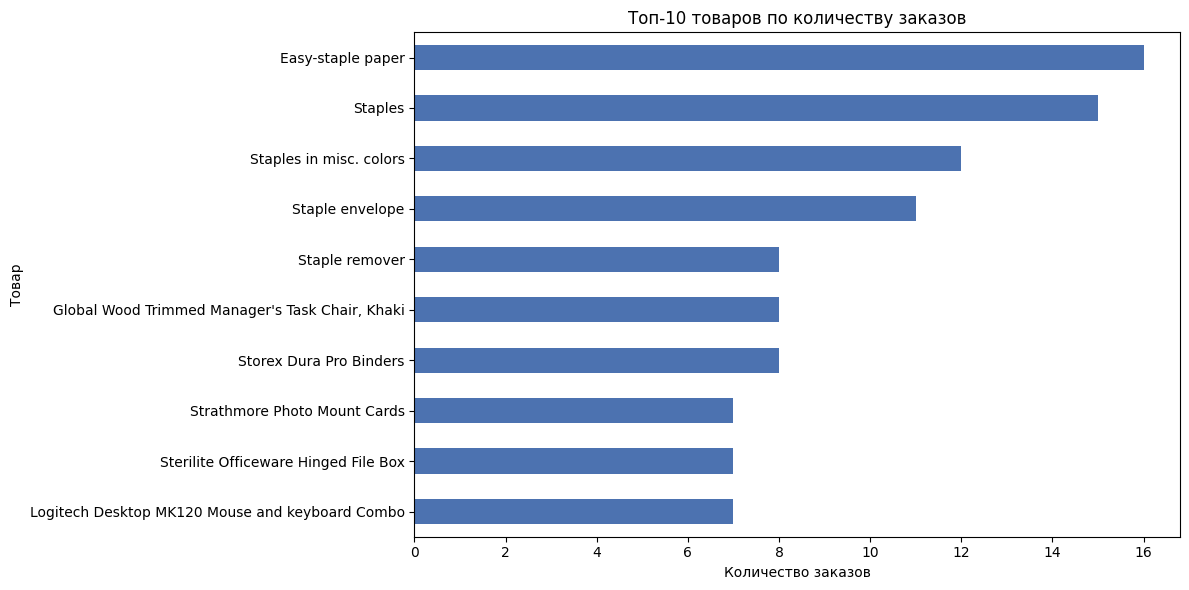

In [21]:

# Топ-10 товаров по количеству заказов
top_products = amazon_df.groupby('Product Name')['Order ID'].nunique().nlargest(10)

# График
plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind='barh', color='#4c72b0')
plt.title('Топ-10 товаров по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Товар')
plt.tight_layout()
plt.show()

Вывод:
- больше всего продаются товары Easy-staple paper и Staples

In [29]:
# Топ-10 товаров по количеству заказов
top_products = amazon_df.groupby('Product Name')['Order ID'].nunique().nlargest(10).reset_index().rename(columns={'Order ID':'orderCount'})
top_products

,Product Name,orderCount
0,Easy-staple paper,16
1,Staples,15
2,Staples in misc. colors,12
3,Staple envelope,11
4,"Global Wood Trimmed Manager's Task Chair, Khaki",8
5,Staple remover,8
6,Storex Dura Pro Binders,8
7,Logitech Desktop MK120 Mouse and keyboard Combo,7
8,Sterilite Officeware Hinged File Box,7
9,Strathmore Photo Mount Cards,7


9. Изучи распределение категорий внутри города или штата. Здесь можно сгруппировать данные по городу и по категории, посчитать количество заказов и визуализировать полученные результаты. Возможно, ты увидишь, что для каждого города есть свой паттерн - например, в Калифорнии заказывают больше фурнитуры, а жители Лос-Анджелеса больше покупают товаров из категории "Технологии". Можно углубиться до подкатегорий. Установленные закономерности опиши в текстовой ячейке;

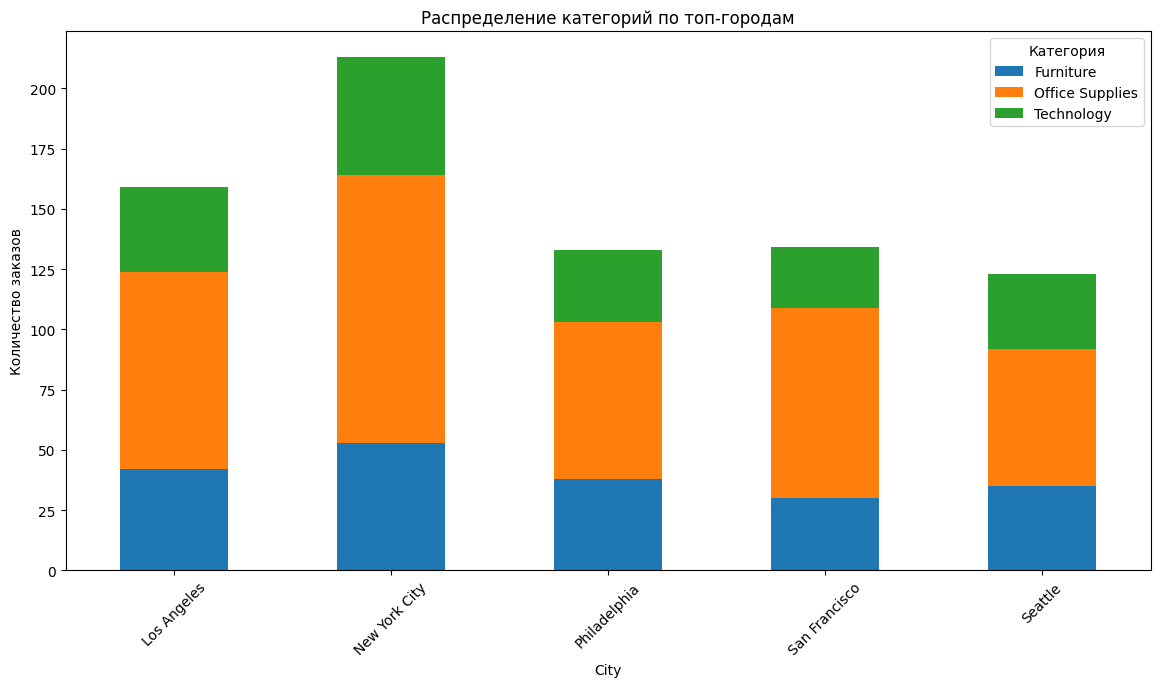

Топ-5 подкатегорий в New York City:
Sub-Category
Paper          40
Binders        38
Phones         33
Furnishings    27
Storage        20
Name: Order ID, dtype: int64


In [23]:

# Топ-5 городов по заказам
top_cities = amazon_df['City'].value_counts().nlargest(5).index

# Фильтрация данных для топ-городов
filtered_df = amazon_df[amazon_df['City'].isin(top_cities)]

# Группировка по городу и категории
city_category = filtered_df.groupby(['City', 'Category'])['Order ID'].nunique().unstack()

# Визуализация
city_category.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Распределение категорий по топ-городам')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend(title='Категория')
plt.show()

# Анализ подкатегорий для топ-города (пример)
top_city = top_cities[0]
city_subcat = filtered_df[filtered_df['City'] == top_city].groupby('Sub-Category')['Order ID'].nunique().nlargest(5)

print(f"Топ-5 подкатегорий в {top_city}:")
print(city_subcat)

In [24]:
# Автоанализ доминирующей категории
for city in top_cities:
    dominant_category = city_category.loc[city].idxmax()
    percent = (city_category.loc[city].max() / city_category.loc[city].sum() * 100).round(1)
    print(f"{city}: {dominant_category} ({percent}%)")

New York City: Office Supplies (52.1%)
Los Angeles: Office Supplies (51.6%)
San Francisco: Office Supplies (59.0%)
Seattle: Office Supplies (46.3%)
Philadelphia: Office Supplies (48.9%)


Вывод: Исходя из анализа наиболее востребованной категорией, независимо от города, является  Office Supplies

10. Проанализируй динамику продаж внутри категорий и подкатегорий. Отметь пики и спады продаж внутри каждой категории и внутри каждой подкатегории, сравни с общим графиком динамики продаж и сформируй выводы.

<ipython-input-25-2e6f46cc14fd>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = amazon_df.set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  category_sales = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  category_sales = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  category_sales = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()


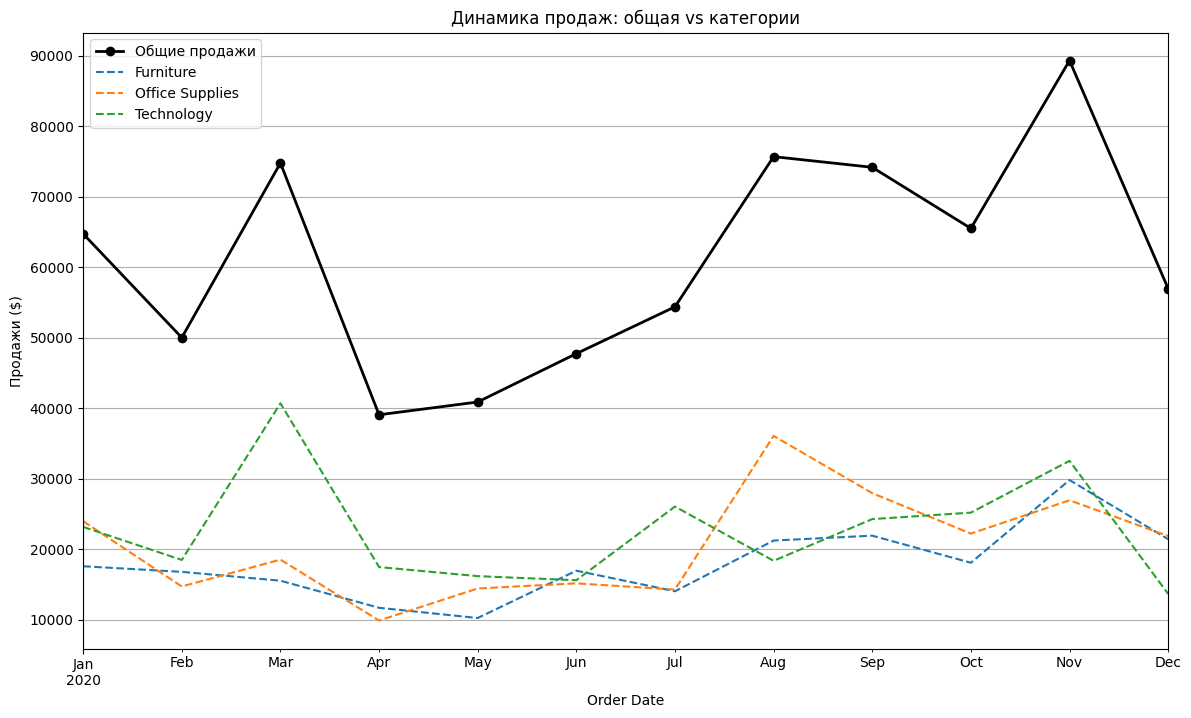

<ipython-input-25-2e6f46cc14fd>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subcat_sales = amazon_df[amazon_df['Sub-Category'] == subcat].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subcat_sales = amazon_df[amazon_df['Sub-Category'] == subcat].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  subcat_sales = amazon_df[amazon_df['Sub-Category'] == subcat].set_index('Order Date')['Sales'].resample('M').sum()


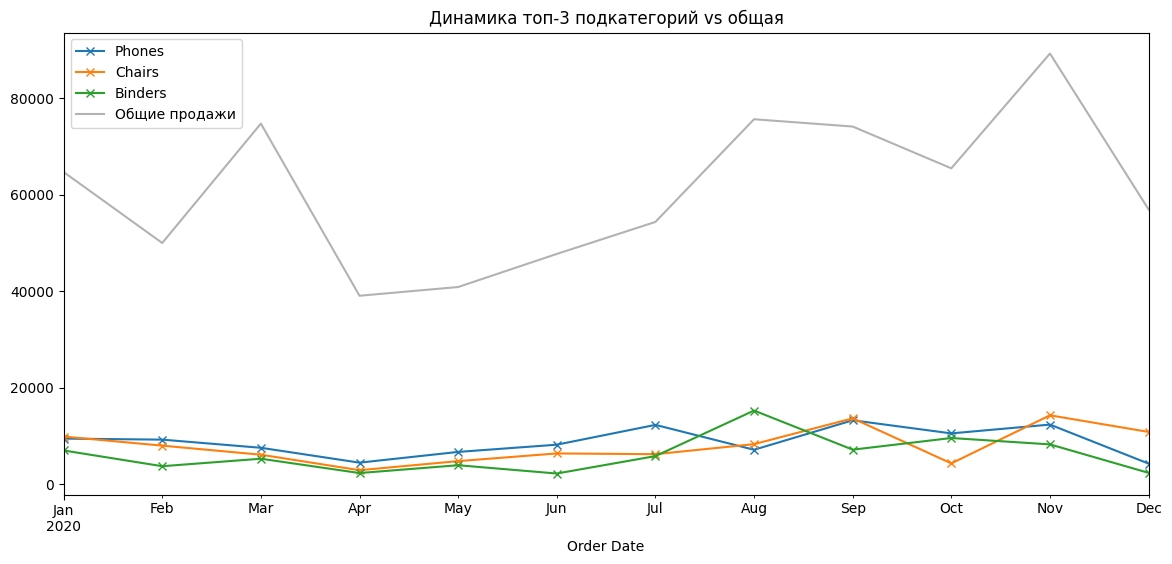


АНАЛИЗ ТРЕНДОВ:
Общие продажи: пик (Nov 2020), спад (Apr 2020), волатильность 129%
Furniture: пик (Nov 2020), спад (May 2020), волатильность 191%
Office Supplies: пик (Aug 2020), спад (Apr 2020), волатильность 265%
Technology: пик (Mar 2020), спад (Dec 2020), волатильность 198%


<ipython-input-25-2e6f46cc14fd>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cat_series = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cat_series = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
<ipython-input-25-2e6f46cc14fd>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cat_series = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()


In [25]:
import matplotlib.pyplot as plt

# Общая динамика продаж
plt.figure(figsize=(14, 8))
monthly_sales = amazon_df.set_index('Order Date')['Sales'].resample('M').sum()
monthly_sales.plot(label='Общие продажи', color='black', linewidth=2, marker='o')

# Динамика по категориям
for category in amazon_df['Category'].unique():
    category_sales = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
    category_sales.plot(label=category, linestyle='--')

plt.title('Динамика продаж: общая vs категории')
plt.ylabel('Продажи ($)')
plt.legend()
plt.grid(True)
plt.show()

# Анализ подкатегорий (топ-3 по продажам)
top_subcats = amazon_df.groupby('Sub-Category')['Sales'].sum().nlargest(3).index
plt.figure(figsize=(14, 6))
for subcat in top_subcats:
    subcat_sales = amazon_df[amazon_df['Sub-Category'] == subcat].set_index('Order Date')['Sales'].resample('M').sum()
    subcat_sales.plot(label=subcat, marker='x')

monthly_sales.plot(label='Общие продажи', color='black', alpha=0.3)
plt.title('Динамика топ-3 подкатегорий vs общая')
plt.legend()
plt.show()

# Автоматический анализ пиков/спадов
def analyze_trend(series, name):
    peak = series.idxmax().strftime('%b %Y')
    trough = series.idxmin().strftime('%b %Y')
    change = (series.max() / series.min() - 1) * 100
    return f"{name}: пик ({peak}), спад ({trough}), волатильность {change:.0f}%"

print("\nАНАЛИЗ ТРЕНДОВ:")
print(analyze_trend(monthly_sales, 'Общие продажи'))
for category in amazon_df['Category'].unique():
    cat_series = amazon_df[amazon_df['Category'] == category].set_index('Order Date')['Sales'].resample('M').sum()
    print(analyze_trend(cat_series, category))

In [26]:
peak_month = monthly_sales.idxmax()
peak_data = amazon_df[amazon_df['Order Date'].dt.to_period('M') == peak_month.to_period('M')]
print("Вклад в пик:", peak_data.groupby('Sub-Category')['Sales'].sum().nlargest(3))

Вклад в пик: Sub-Category
Chairs     14275.642
Phones     12352.576
Copiers    11399.952
Name: Sales, dtype: float64


Заключительный вывод: Проанализировали продажи по 4 регионам США. Период продаж 2020 год
- Уникальные заказы: 1687
- Уникальные клиенты: 693
- Наибольшее количество заказов на западе США, наименьшее на юге США
- Топ-3 штата: Калифорния, Нью Йорк и Техас, при этом наибольшее количество заказов в Калифорнии. Наименьшее количество заказов в штатах Сев.Каролина и Теннеси.
- Город Нью Йорк лидирует с более чем 300 заказами (9.2% от общего числа заказов), наименьшее количество заказов в г.Джексонвиль (1.2%)около 40
## Проанализировав динамику заказов по дате заказов (для лучшего восприятия сгрупировал помесячно):
- Пик заказов в 11.2020 - 213 заказов.
С марта по май наблюдается падение  на 28%. С августа начался подъем до пика на 74%
Последний месяц 12.2020 г. показывает снижение на 33% по сравнению с пиком.
## В динамике продаж по сумме:
- Пик продаж: 11.2020 -  89,3 usd
− Минимум:04.2020− 39 usd
Последнее изменение: падение на 36% за месяц.
## В распределении по категориям:

ЛИДЕРЫ:
- Категория [Technology] - 37.1% от всех продаж
- Подкатегория [Phones] - 14.4% от всех продаж

АУТСАЙДЕРЫ:

- Категория [Furniture] - 29.4%
- Подкатегория [Fasteners] - 0.1%

## По распределению продаж по регионам:
- Регион West доминирует (34.1% всех продаж)
- Штат California и город New York City синхронно лидируют: Нет
- В South самые низкие продажи (122,906$)
- Топ-3 города дают 55.2% продаж в топ-10

## Самые популярные товары:
- Easy-staple paper
- Staple
- Staples in misc. colors
 ## При анализе распределения категорий по штатам и городам:
New York City: Office Supplies (52.1%)
Los Angeles: Office Supplies (51.6%)
San Francisco: Office Supplies (59.0%)
Seattle: Office Supplies (46.3%)
Philadelphia: Office Supplies (48.9%)
- Во всех городах топ 5 по продажам лидирует категория Office Supplies
- Конкретно если взять лидирующий по продажам город New York City, то наиболее востребованные товары:
- Paper          40
- Binders        38
- Phones         33
- Furnishings    27
- Storage        20

## Динамика продаж внутри категорий|подкатегорий:

АНАЛИЗ ТРЕНДОВ:

- Общие продажи: пик (Nov 2020), спад (Apr 2020), волатильность 129%
- Furniture: пик (Nov 2020), спад (May 2020), волатильность 191%
- Office Supplies: пик (Aug 2020), спад (Apr 2020), волатильность 265%
- Technology: пик (Mar 2020), спад (Dec 2020), волатильность 198%

Наблудается довольно высокая волатильность

Вклад в пик:

- Chairs     14275.642
- Phones     12352.576
- Copiers    11399.952